# COVID-19 data analysis around the world

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import numpy as np
from utils import plot_cases, plot_cases_marked, plot_together

In [2]:
patients = pd.read_csv("data/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
covid19 = pd.read_csv("data/clean_data.csv", parse_dates=['Date'])
population = pd.read_csv("data/population_clean.csv")

# Preprocessing

In [3]:
all_covid19 = covid19.sort_values(['Date','Country/Region','Province/State'])
all_covid19[['Province/State']] = all_covid19[['Province/State']].fillna('')
all_covid19[['Province/State']] = all_covid19[['Province/State']].fillna('')
all_covid19[['Confirmed', 'Deaths', 'Recovered']] = all_covid19[['Confirmed', 'Deaths', 'Recovered']].fillna(0)
countries = all_covid19['Country/Region'].unique()

covid19_today_regions = all_covid19[all_covid19['Date'] == all_covid19['Date'].max()]
covid19_today = covid19_today_regions.groupby('Country/Region').sum()[['Confirmed', 'Deaths', 'Recovered']]
covid19_today['PercDeath'] = 100 * covid19_today['Deaths'] / covid19_today['Confirmed']

population = population[['Country Name', '2018']]
pops = [population[population['Country Name'] == c]['2018'].values for c in countries]
pops = [p[0] if len(p) > 0 else None for p in pops]
covid19_today["Population"] = pops

covid19_today.head()

,Confirmed,Deaths,Recovered,PercDeath,Population
Country/Region,,,,,
Afghanistan,16,0,0,0.000000,37172386.0
Albania,42,1,0,2.380952,2866376.0
Algeria,48,4,12,8.333333,42228429.0
Andorra,1,0,1,0.000000,77006.0
Antigua and Barbuda,1,0,0,0.000000,96286.0


# World analysis

### Stats

In [4]:
print("Total number of confirmed cases:", covid19_today.sum()['Confirmed'])
print("Total number of deaths:", covid19_today.sum()['Deaths'])
print("Total number of recovered cases:", covid19_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid19_today.sum()['Deaths'] / covid19_today.sum()['Confirmed']))

Total number of confirmed cases: 167449.0
Total number of deaths: 6440.0
Total number of recovered cases: 76034.0
% of death: 3.846%


In [5]:
# There is a cruiser ship with 696 cases and 7 deaths, that's why I removed 1
print("Number of countries with at least one case:", len(covid19_today)-1)
print("Number of countries with at least 100 case:", len(covid19_today[covid19_today['Confirmed'] > 100])-1)
print("Number of countries with at least 1 death:", len(covid19_today[covid19_today['Deaths'] > 1])-1)

Number of countries with at least one case: 146
Number of countries with at least 100 case: 45
Number of countries with at least 1 death: 32


### Age distribution

#### Samples per country

In [6]:
c = patients[['age', 'country']].dropna().country
print("Number of samples:", len(c))
print (c.value_counts())

Number of samples: 1328
China                   856
Japan                   180
Singapore                91
South Korea              30
Italy                    19
Thailand                 16
Malaysia                 16
Vietnam                  16
Australia                15
Canada                   10
Germany                  10
France                   10
Switzerland               8
United States             7
Sweden                    6
Spain                     6
United Arab Emirates      4
Romania                   3
Kuwait                    3
Philippines               3
Finland                   2
Georgia                   2
Croatia                   2
Lebanon                   2
Cambodia                  1
Greece                    1
Pakistan                  1
North Macedonia           1
San Marino                1
Lithuania                 1
Afghanistan               1
Sri Lanka                 1
Estonia                   1
Brazil                    1
Nepal                   

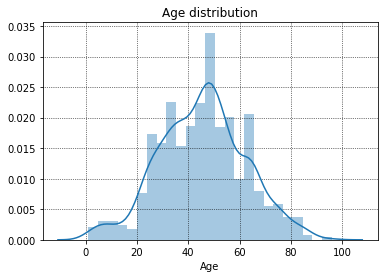

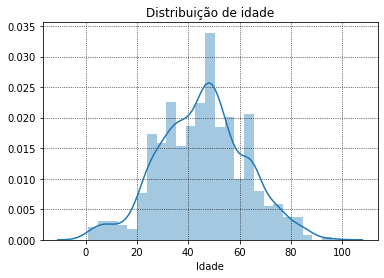

In [7]:
int_ages = list()
for age_str in patients['age'].dropna():
    try:
        i_age = int(age_str)
        int_ages.append(i_age)
    except ValueError:
        ages = age_str.split('-')        
        try:
            m_age = (int(ages[0]) + int(ages[1]))/2
            int_ages.append(m_age)
        except ValueError:
            pass

# EN
sns.distplot(int_ages)
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Age")
plt.title('Age distribution')
plt.savefig("figures/en/age_distribution.png")
plt.figure()

# PT
sns.distplot(int_ages)
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Idade")
plt.title('Distribuição de idade')
plt.savefig("figures/pt/distribuicao_idades.png")

#### Outside China

In [8]:
covid19_today_no_china = covid19_today.drop('China')
print("Total number of confirmed cases:", covid19_today_no_china.sum()['Confirmed'])
print("Total number of deaths:", covid19_today_no_china.sum()['Deaths'])
print("Total number of recovered cases:", covid19_today_no_china.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid19_today_no_china.sum()['Deaths'] / covid19_today_no_china.sum()['Confirmed']))

Total number of confirmed cases: 86446.0
Total number of deaths: 3237.0
Total number of recovered cases: 9017.0
% of death: 3.745%


## Confirmed case per day

#### Worldwide

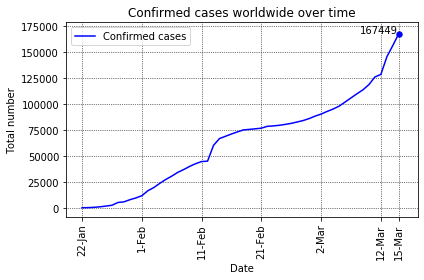

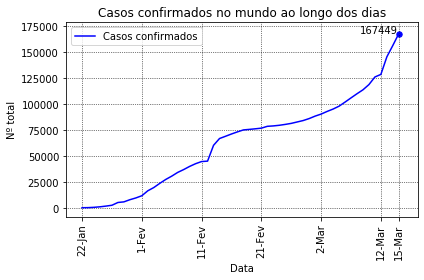

In [9]:
covid19_per_date = all_covid19.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (covid19_per_date, "Confirmed", "b", "Confirmed cases worldwide over time", 
            "Confirmed cases", "Date", "Total number", "figures/en/conf_cases_worldwide.png")

# PT
plot_cases (covid19_per_date, "Confirmed", "b", "Casos confirmados no mundo ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_mundo.png", 'pt')

#### Worldwide without China

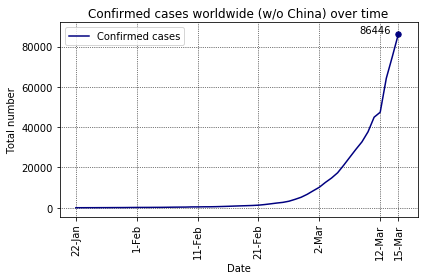

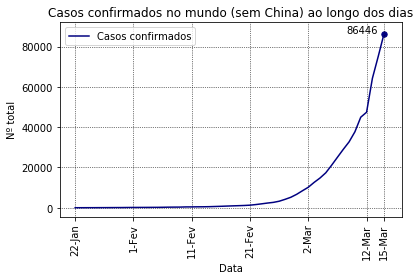

In [10]:
covid19_per_date_no_china = all_covid19[all_covid19['Country/Region'] != 'China']
covid19_per_date_no_china = covid19_per_date_no_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]


# EN
plot_cases (covid19_per_date_no_china, "Confirmed", "navy", "Confirmed cases worldwide (w/o China) over time", 
            "Confirmed cases", "Date", "Total number", "figures/en/conf_cases_worldwide_no_china.png")

# PT
plot_cases (covid19_per_date_no_china, "Confirmed", "navy", "Casos confirmados no mundo (sem China) ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_mundo_sem_china.png", 'pt')


#### Only in China

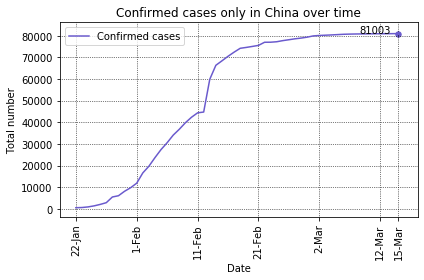

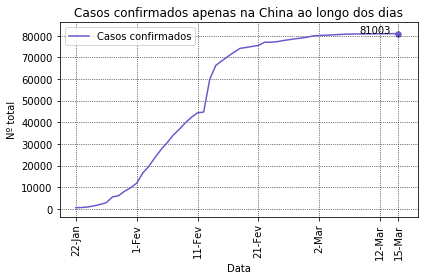

In [11]:
covid19_per_date_china = all_covid19[all_covid19['Country/Region'] == 'China']
covid19_per_date_china = covid19_per_date_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]


# EN
plot_cases (covid19_per_date_china, "Confirmed", "slateblue", "Confirmed cases only in China over time", 
            "Confirmed cases", "Date", "Total number", "figures/en/conf_cases_in_china.png")

# PT
plot_cases (covid19_per_date_china, "Confirmed", "slateblue", "Casos confirmados apenas na China ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_na_china.png", 'pt')

## Deaths per day

#### Worldwide

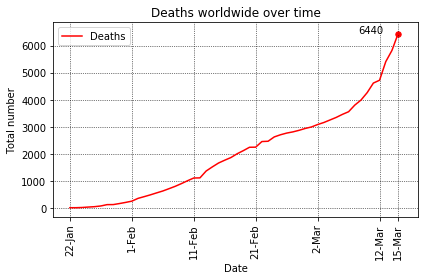

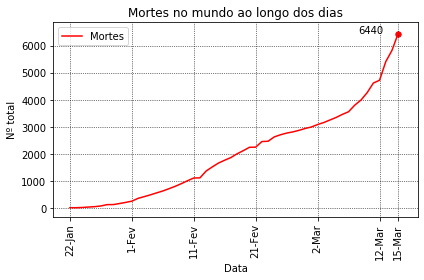

In [12]:
covid19_per_date = all_covid19.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (covid19_per_date, "Deaths", "r", "Deaths worldwide over time", 
            "Deaths", "Date", "Total number", "figures/en/deaths_worldwide.png")

# PT
plot_cases (covid19_per_date, "Deaths", "r", "Mortes no mundo ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_mundo.png", 'pt')

#### Worldwide without China

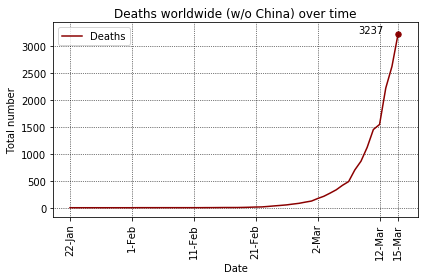

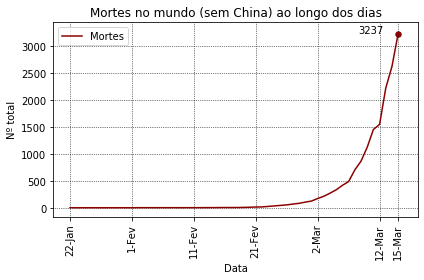

In [13]:
covid19_per_date_no_china = all_covid19[all_covid19['Country/Region'] != 'China']
covid19_per_date_no_china = covid19_per_date_no_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]


# EN
plot_cases (covid19_per_date_no_china, "Deaths", "darkred", "Deaths worldwide (w/o China) over time", 
            "Deaths", "Date", "Total number", "figures/en/deaths_worldwide_no_china.png")

# PT
plot_cases (covid19_per_date_no_china, "Deaths", "darkred", "Mortes no mundo (sem China) ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_mundo_sem_china.png", 'pt')

#### Only in China

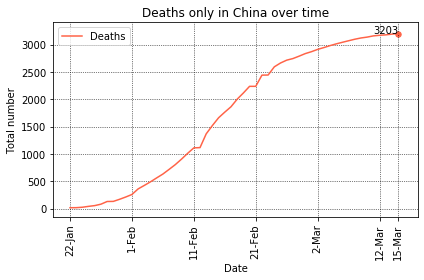

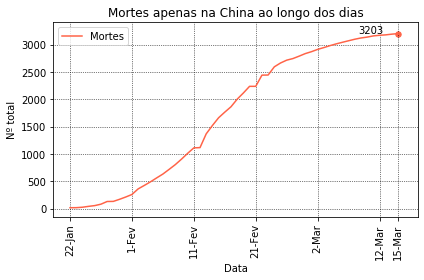

In [14]:
covid19_per_date_china = all_covid19[all_covid19['Country/Region'] == 'China']
covid19_per_date_china = covid19_per_date_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]


# EN
plot_cases (covid19_per_date_china, "Deaths", "tomato", "Deaths only in China over time", 
            "Deaths", "Date", "Total number", "figures/en/mortes_in_china.png", offset_x=-5)

# PT
plot_cases (covid19_per_date_china, "Deaths", "tomato", "Mortes apenas na China ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_china.png", 'pt')

## Top 10 infected countries

In [49]:
top_10 = covid19_today.sort_values('Confirmed', ascending=False)[:10]
top_10['PercPop'] = 100 * top_10['Confirmed'] / top_10['Population']
top_10.drop(columns=['Population'], inplace=True)
top_10
# print(top_10.to_markdown())

,Confirmed,Deaths,Recovered,PercDeath,PercPop
Country/Region,,,,,
China,81003,3203,67017,3.954175,0.005816
Italy,24747,1809,2335,7.309977,0.040951
Iran,13938,724,4590,5.194432,0.017039
"Korea, South",8162,75,510,0.918892,0.015807
Spain,7798,289,517,3.706078,0.016690
Germany,5795,11,46,0.189819,0.006988
France,4513,91,12,2.016397,0.006737
US,3499,63,12,1.800514,0.001069
Switzerland,2200,14,4,0.636364,0.025832


## Countries with more than 100 confirmed case and without deaths

In [16]:
no_death = covid19_today[(covid19_today['Deaths'] == 0) & (covid19_today['Confirmed'] > 200)]
no_death.drop(columns=['PercDeath', 'Population'])
# no_death.to_markdown()

,Confirmed,Deaths,Recovered
Country/Region,,,
Bahrain,214,0,60
Czechia,253,0,0
Finland,244,0,10
Israel,251,0,4
Malaysia,428,0,42
Portugal,245,0,2
Qatar,401,0,4
Singapore,226,0,105


## Countries with more than 500 confirmed case and less than 5 deaths

In [17]:
no_death = covid19_today[(covid19_today['Deaths'] <= 5) & (covid19_today['Confirmed'] > 500)]
no_death.drop(columns=['PercDeath', 'Population'])
# no_death.to_markdown()

,Confirmed,Deaths,Recovered
Country/Region,,,
Austria,860,1,6
Belgium,886,4,1
Denmark,875,2,1
Norway,1221,3,1
Sweden,1022,3,1


# Countries

## Italy

### Confirmed cases

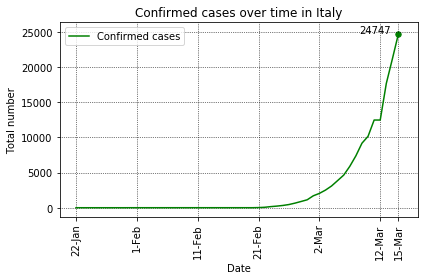

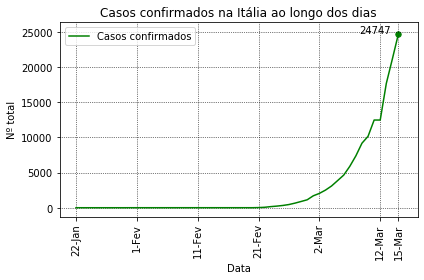

In [18]:
italy = all_covid19[all_covid19['Country/Region'] == 'Italy']
italy = italy.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]


# EN
plot_cases (italy, "Confirmed", "g", "Confirmed cases over time in Italy", 
            "Confirmed cases", "Date", "Total number", "figures/en/conf_cases_in_italy.png")

# PT
plot_cases (italy, "Confirmed", "g", "Casos confirmados na Itália ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_italia.png", 'pt')

### Deaths

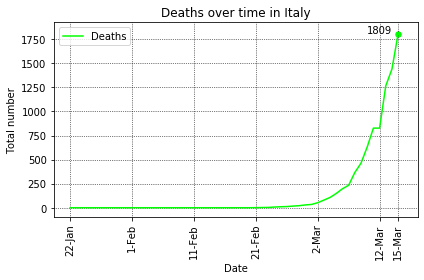

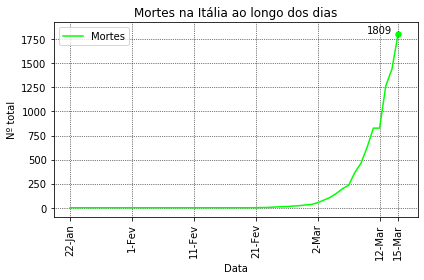

In [19]:
# EN
plot_cases (italy, "Deaths", "lime", "Deaths over time in Italy", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_italy.png", offset_x=-6)

# PT
plot_cases (italy, "Deaths", "lime", "Mortes na Itália ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_italia.png", 'pt', offset_x=-6)

### Early cases

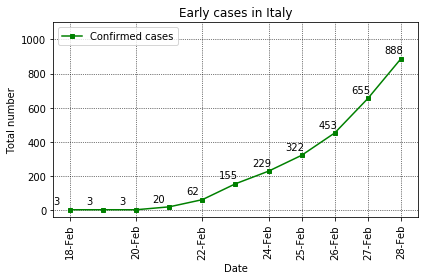

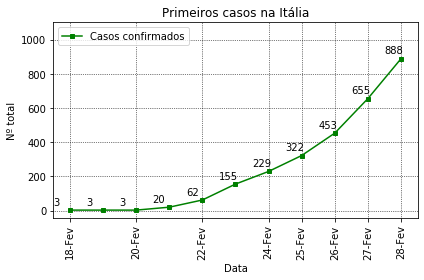

In [20]:
italy_early = italy[(italy["Confirmed"] > 2) & (italy["Confirmed"] < 1000)]['Confirmed'][11:]
# ticks_pos = [0, 10, 14, 17, 19, 21]
ticks_pos = [0, 2, 4, 6, 7, 8, 9, 10]

plot_cases_marked (italy_early, "g", "Early cases in Italy", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_italia.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1100)

plot_cases_marked (italy_early, "g", "Primeiros casos na Itália", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_italia.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1100)


## France

### Confirmed cases

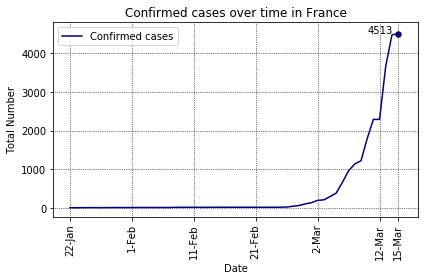

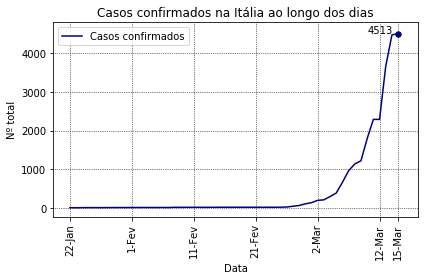

In [21]:
france = all_covid19[all_covid19['Country/Region'] == 'France']
france = france.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (france, "Confirmed", "navy", "Confirmed cases over time in France", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_france.png", offset_x=-6)

# PT
plot_cases (france, "Confirmed", "navy", "Casos confirmados na Itália ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_france.png", 'pt', offset_x=-6)

### Deaths

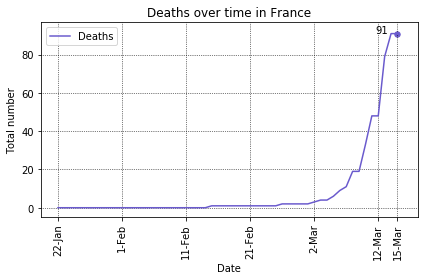

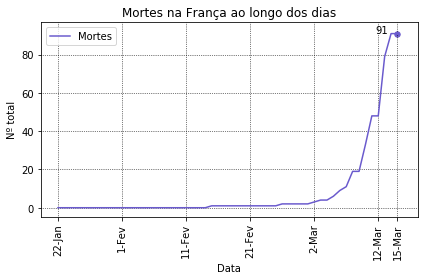

In [22]:
# EN
plot_cases (france, "Deaths", "slateblue", "Deaths over time in France", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_france.png", offset_x=-4.5)

# PT
plot_cases (france, "Deaths", "slateblue", "Mortes na França ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_franca.png", 'pt', offset_x=-4.5)

### Early cases

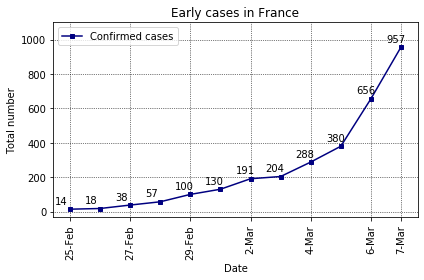

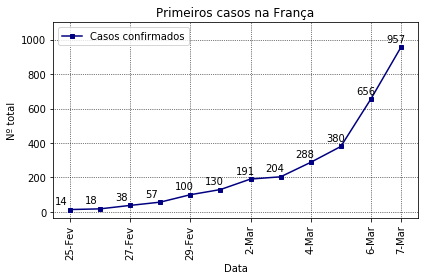

In [23]:
france_early = france[(france["Confirmed"] > 12) & (france["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0,2,4,6,8,10,11]   

plot_cases_marked (france_early, "navy", "Early cases in France", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_france.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1100)

plot_cases_marked (france_early, "navy", "Primeiros casos na França", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_france.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1100)


## USA

### Confirmed cases

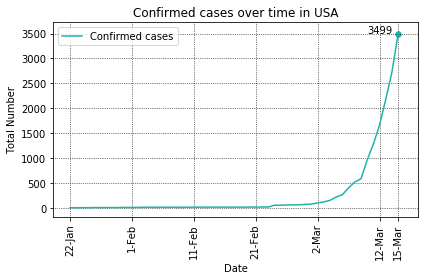

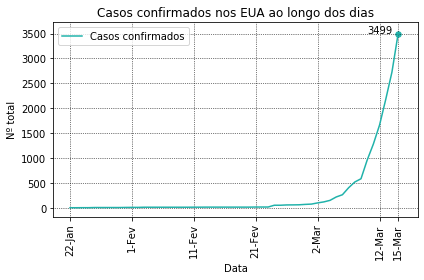

In [24]:
US = all_covid19[all_covid19['Country/Region'] == 'US']
US = US.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]


# EN
plot_cases (US, "Confirmed", "lightseagreen", "Confirmed cases over time in USA", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_USA.png", offset_x=-6)

# PT
plot_cases (US, "Confirmed", "lightseagreen", "Casos confirmados nos EUA ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_EUA.png", 'pt', offset_x=-6)

### Deaths

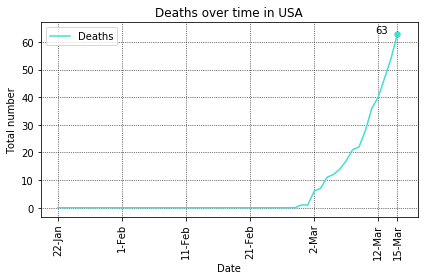

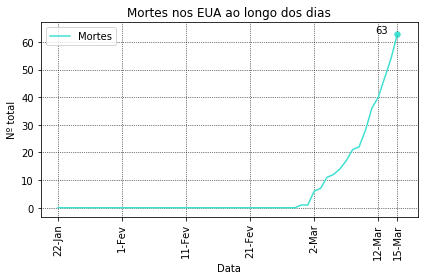

In [25]:
# EN
plot_cases (US, "Deaths", "turquoise", "Deaths over time in USA", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_USA.png", offset_x=-4.5)

# PT
plot_cases (US, "Deaths", "turquoise", "Mortes nos EUA ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_EUA.png", 'pt', offset_x=-4.5)

### Early cases

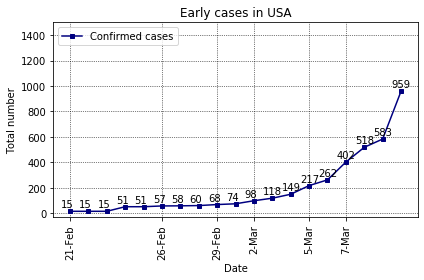

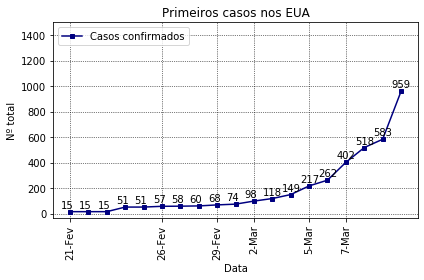

In [26]:
US_early = US[(US["Confirmed"] > 14) & (US["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0,5,8,10,13,15]

# EN
plot_cases_marked (US_early, "navy", "Early cases in USA", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_USA.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1500)

# PT
plot_cases_marked (US_early, "navy", "Primeiros casos nos EUA", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_EUA.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1500)

## Germany

### Confirmed cases

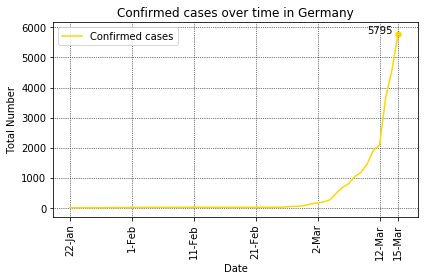

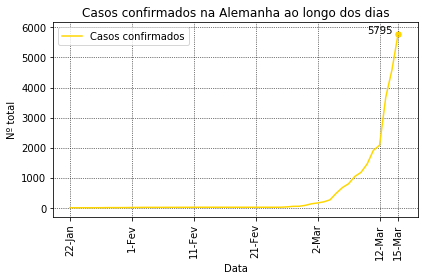

In [27]:
germany = all_covid19[all_covid19['Country/Region'] == 'Germany']
germany = germany.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (germany, "Confirmed", "gold", "Confirmed cases over time in Germany", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_germany.png", offset_x=-6)

# PT
plot_cases (germany, "Confirmed", "gold", "Casos confirmados na Alemanha ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_alemanha.png", 'pt', offset_x=-6)

### Deaths

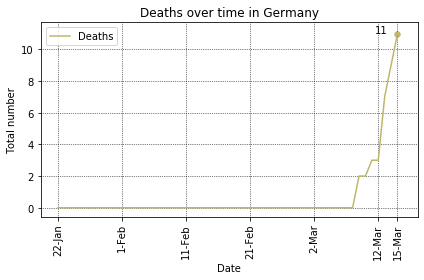

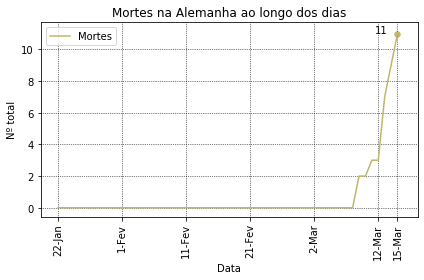

In [28]:
# EN
plot_cases (germany, "Deaths", "darkkhaki", "Deaths over time in Germany", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_germany.png", offset_x=-4.5)

# PT
plot_cases (germany, "Deaths", "darkkhaki", "Mortes na Alemanha ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_alemanha.png", 'pt', offset_x=-4.5)

### Early cases

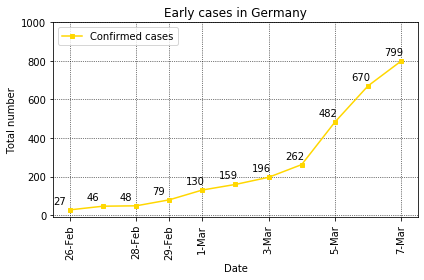

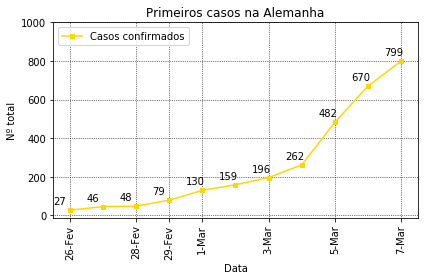

In [29]:
germany_early = germany[(germany["Confirmed"] > 17) & (germany["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0,2,3,4,6,8,10]

# EN
plot_cases_marked (germany_early, "gold", "Early cases in Germany", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_germany.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1000)

# PT
plot_cases_marked (germany_early, "gold", "Primeiros casos na Alemanha", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_alemanha.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1000)

## South Korea

### Confirmed cases

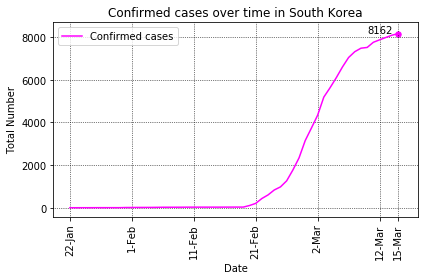

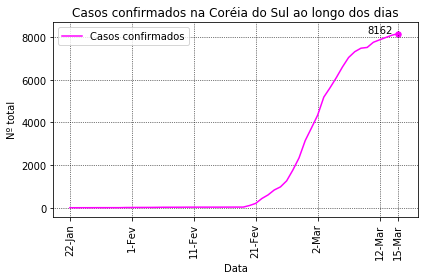

In [30]:
korea = all_covid19[all_covid19['Country/Region'] == 'Korea, South']
korea = korea.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (korea, "Confirmed", "magenta", "Confirmed cases over time in South Korea", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_germany.png", offset_x=-6)

# PT
plot_cases (korea, "Confirmed", "magenta", "Casos confirmados na Coréia do Sul ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_coreia.png", 'pt', offset_x=-6)

### Deaths

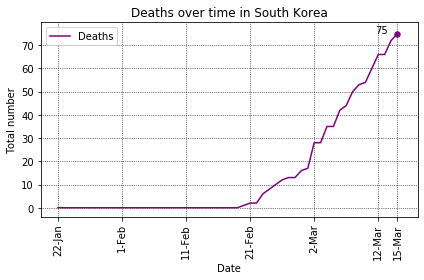

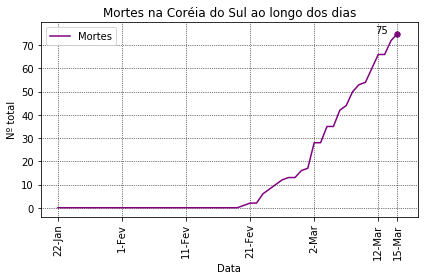

In [31]:
# EN
plot_cases (korea, "Deaths", "purple", "Deaths over time in South Korea", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_korea.png", offset_x=-4.5)

# PT
plot_cases (korea, "Deaths", "purple", "Mortes na Coréia do Sul ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_coreia.png", 'pt', offset_x=-4.5)

### Early cases

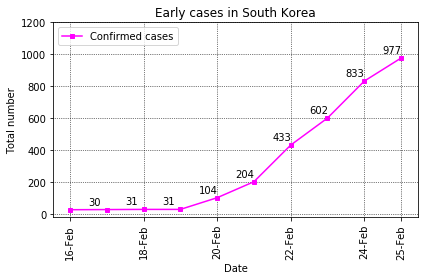

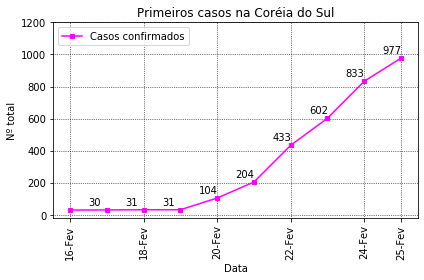

In [32]:
korea_early = korea[(korea["Confirmed"] > 28) & (korea["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0,2,4,6,8,9]

# EN
plot_cases_marked (korea_early, "magenta", "Early cases in South Korea", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_korea.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1200)

# PT
plot_cases_marked (korea_early, "magenta", "Primeiros casos na Coréia do Sul", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_coreia.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1200)

## Iran

### Confirmed cases

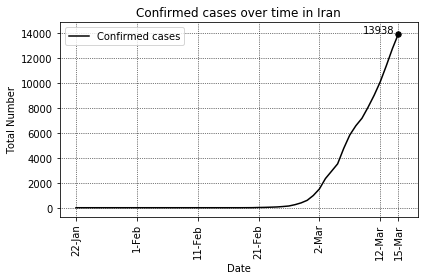

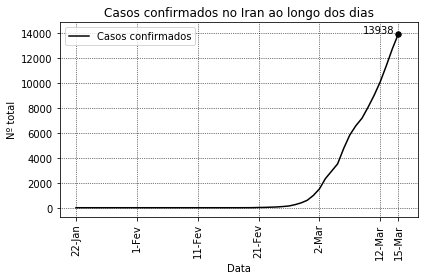

In [33]:
iran = all_covid19[all_covid19['Country/Region'] == 'Iran']
iran = iran.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (iran, "Confirmed", "k", "Confirmed cases over time in Iran", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_iran.png", offset_x=-6.9)

# PT
plot_cases (iran, "Confirmed", "k", "Casos confirmados no Iran ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_iran.png", 'pt', offset_x=-6.9)

### Deaths

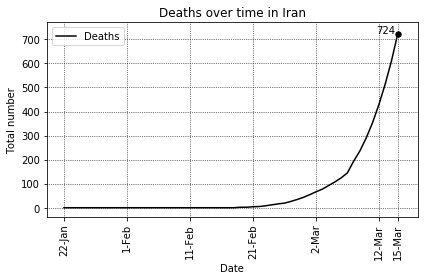

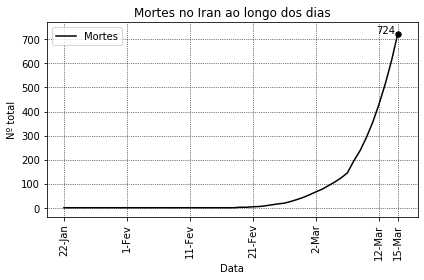

In [34]:
# EN
plot_cases (iran, "Deaths", "k", "Deaths over time in Iran", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_iran.png", offset_x=-4.5)

# PT
plot_cases (iran, "Deaths", "k", "Mortes no Iran ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_iran.png", 'pt', offset_x=-4.5)

### Early cases

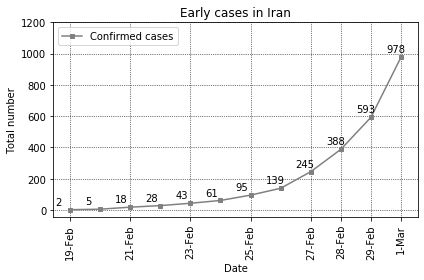

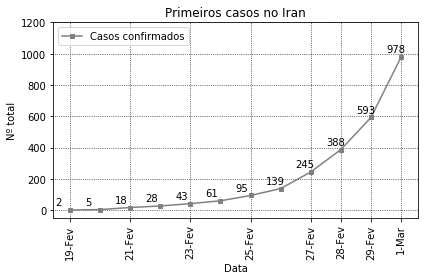

In [35]:
iran_early = iran[(iran["Confirmed"] > 0) & (iran["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0,2,4,6,8,9,10,11]

# EN
plot_cases_marked (iran_early, "gray", "Early cases in Iran", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_iran.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1200)

# PT
plot_cases_marked (iran_early, "gray", "Primeiros casos no Iran", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_iran.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1200)

## Spain

### Confirmed cases

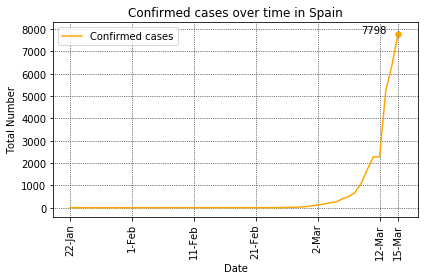

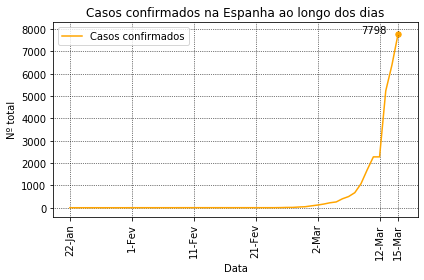

In [36]:
spain = all_covid19[all_covid19['Country/Region'] == 'Spain']
spain = spain.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

# EN
plot_cases (spain, "Confirmed", "orange", "Confirmed cases over time in Spain", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_span.png", offset_x=-6.9)

# PT
plot_cases (spain, "Confirmed", "orange", "Casos confirmados na Espanha ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_espanha.png", 'pt', offset_x=-6.9)

### Deaths

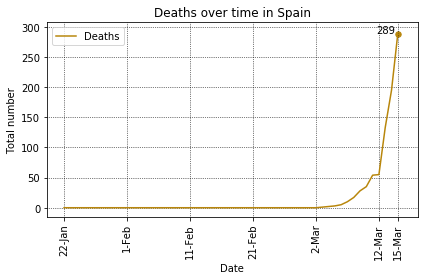

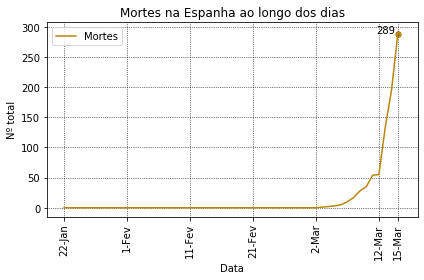

In [37]:
# EN
plot_cases (spain, "Deaths", "darkgoldenrod", "Deaths over time in Spain", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_spain.png", offset_x=-4.5)

# PT
plot_cases (spain, "Deaths", "darkgoldenrod", "Mortes na Espanha ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_espanha.png", 'pt', offset_x=-4.5)

### Early cases

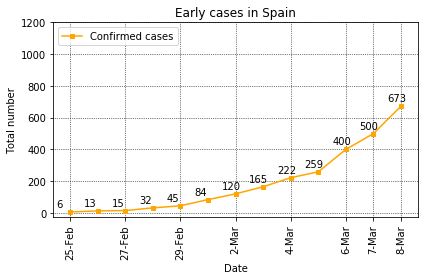

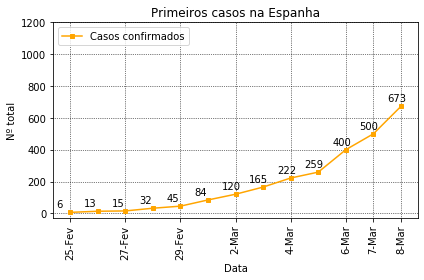

In [38]:
spain_early = spain[(spain["Confirmed"] > 2) & (spain["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0,2,4,6,8,10,11,12]

# EN
plot_cases_marked (spain_early, "orange", "Early cases in Spain", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_spain.png", ticks_pos, lang="en", 
                   offset_x=-0.5, offset_y=30, y_lim=1200)

# PT
plot_cases_marked (spain_early, "orange", "Primeiros casos na Espanha", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_espanha.png", ticks_pos, lang="pt", 
                   offset_x=-0.5, offset_y=30, y_lim=1200)

## Canada

### Confirmed cases

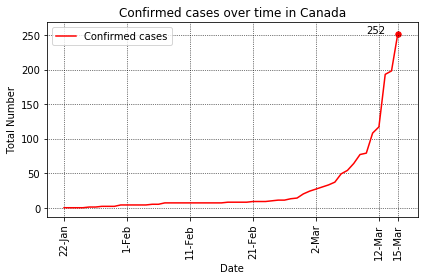

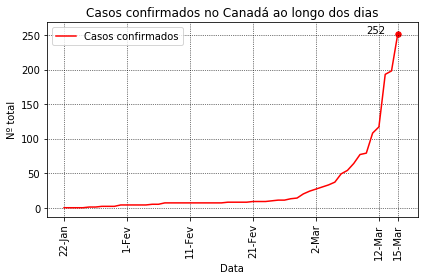

In [39]:
canada = all_covid19[all_covid19['Country/Region'] == 'Canada']
canada = canada.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]
ticks_pos = None

# EN
plot_cases (canada, "Confirmed", "r", "Confirmed cases over time in Canada", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_canada.png", offset_x=-6)

# PT
plot_cases (canada, "Confirmed", "r", "Casos confirmados no Canadá ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_canada.png", 'pt', offset_x=-6)


### Deaths

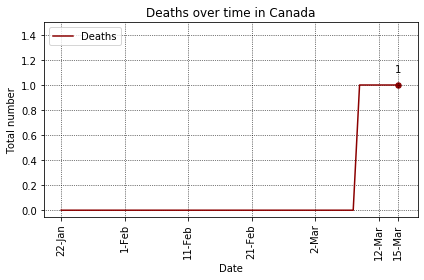

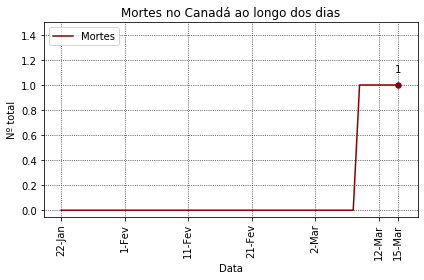

In [40]:
# EN
plot_cases (canada, "Deaths", "darkred", "Deaths over time in Canada", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_canada.png", offset_x=-1.5, 
            offset_y=0.1, y_lim=1.5)

# PT
plot_cases (canada, "Deaths", "darkred", "Mortes no Canadá ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_canada.png", 'pt', offset_x=-1.5, 
            offset_y=0.1, y_lim=1.5)

### Early cases

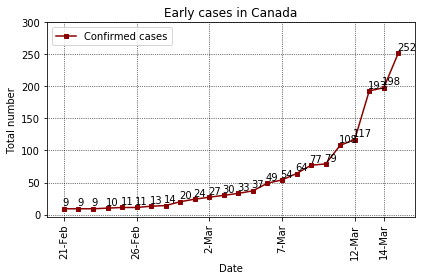

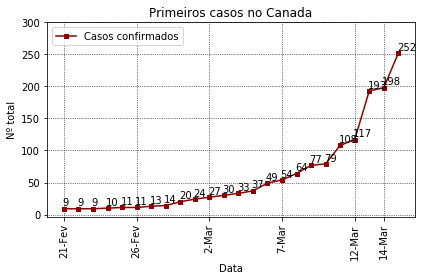

In [41]:
canada_early = canada[(canada["Confirmed"] > 8) & (canada["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0, 5, 10, 15, 20, 22]


# EN
plot_cases_marked (canada_early, "darkred", "Early cases in Canada", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_canada.png", ticks_pos, lang="en", 
                   offset_x=-0.1, offset_y=5, y_lim=300)

# PT
plot_cases_marked (canada_early, "darkred", "Primeiros casos no Canada", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_canada.png", ticks_pos, lang="pt", 
                   offset_x=-0.1, offset_y=5, y_lim=300)

## Brazil

### Confirmed cases

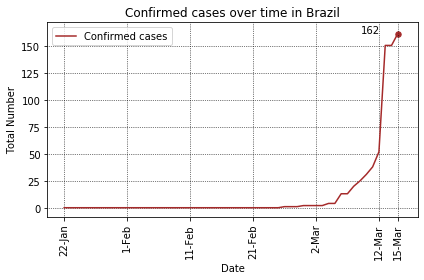

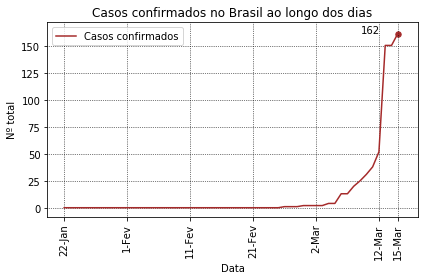

In [42]:
brazil = all_covid19[all_covid19['Country/Region'] == 'Brazil']
brazil = brazil.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]
ticks_pos = None

# EN
plot_cases (brazil, "Confirmed", "brown", "Confirmed cases over time in Brazil", 
            "Confirmed cases", "Date", "Total Number", "figures/en/conf_cases_in_brazil.png", offset_x=-6.9)

# PT
plot_cases (brazil, "Confirmed", "brown", "Casos confirmados no Brasil ao longo dos dias", 
            "Casos confirmados", "Data", "Nº total", "figures/pt/casos_conf_brasil.png", 'pt', offset_x=-6.9)


### Deaths

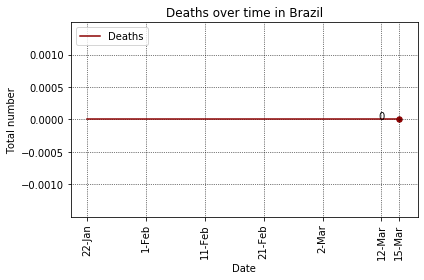

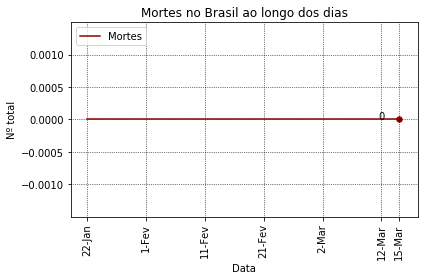

In [43]:
# EN
plot_cases (brazil, "Deaths", "darkred", "Deaths over time in Brazil", 
            "Deaths", "Date", "Total number", "figures/en/deaths_in_brazil.png", offset_x=-4.5)

# PT
plot_cases (brazil, "Deaths", "darkred", "Mortes no Brasil ao longo dos dias", 
            "Mortes", "Data", "Nº total", "figures/pt/mortes_na_brasil.png", 'pt', offset_x=-4.5)

### Early cases

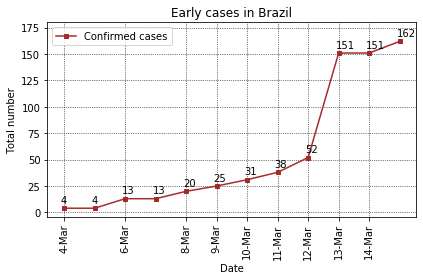

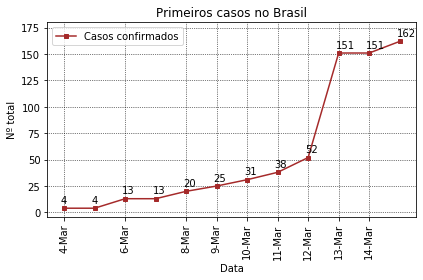

In [44]:
brazil_early = brazil[(brazil["Confirmed"] > 2) & (brazil["Confirmed"] < 1000)]['Confirmed']
ticks_pos = [0, 2, 4, 5, 6, 7, 8, 9, 10]


# EN
plot_cases_marked (brazil_early, "brown", "Early cases in Brazil", "Confirmed cases", "Date", "Total number",
                   "figures/en/early_cases_conf_brazil.png", ticks_pos, lang="en", 
                   offset_x=-0.1, offset_y=5, y_lim=180)

# PT
plot_cases_marked (brazil_early, "brown", "Primeiros casos no Brasil", "Casos confirmados", "Data", "Nº total",
                   "figures/pt/prim_casos_conf_brasil.png", ticks_pos, lang="pt", 
                   offset_x=-0.1, offset_y=5, y_lim=180)


# Coutries together

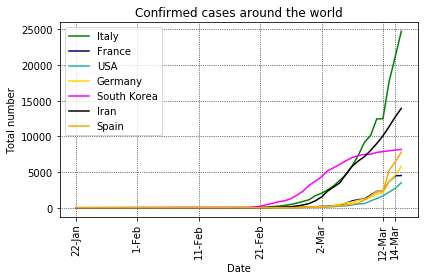

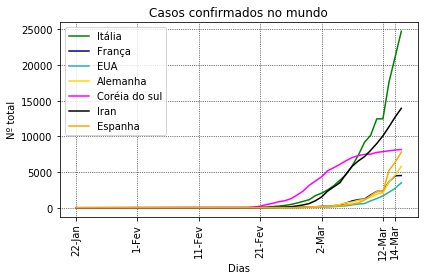

In [45]:

data = [italy, france, US, germany, korea, iran, spain]
colors = ["g", "navy", "lightseagreen", "gold", "magenta", "k", "orange"]
ticks_pos = [0, 10, 20, 30, 40, 50, 52]


# EN
legends = ["Italy", "France", "USA", "Germany", "South Korea", "Iran", "Spain"]
plot_together (data, legends, colors, "Confirmed", "Confirmed cases around the world", "Date", "Total number", 
                   "figures/en/conf_cases_countries.png", ticks_pos, lang="en", y_lim=None)


# PT
legends = ["Itália", "França", "EUA", "Alemanha", "Coréia do sul", "Iran", "Espanha", "Brasil"]
plot_together (data, legends, colors, "Confirmed", "Casos confirmados no mundo", "Dias", "Nº total", 
                   "figures/pt/casos_confirmados_paises.png", ticks_pos, lang="pt", y_lim=None)


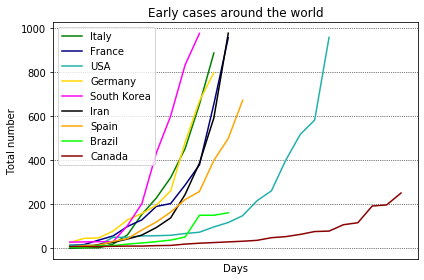

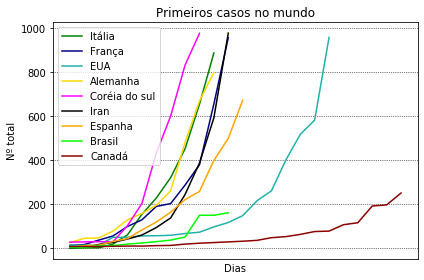

In [46]:
data = [italy_early, france_early, US_early, germany_early, korea_early, iran_early, spain_early, brazil_early, canada_early]
colors = ["g", "navy", "lightseagreen", "gold", "magenta", "k", "orange", "lime", "darkred"]
ticks_pos = None

# EN
legends = ["Italy", "France", "USA", "Germany", "South Korea", "Iran", "Spain", "Brazil", "Canada"]
plot_together (data, legends, colors, None, "Early cases around the world", "Days", "Total number", 
                   "figures/en/conf_early_cases_countries.png", ticks_pos, lang="en", y_lim=None)

# PT
legends = ["Itália", "França", "EUA", "Alemanha", "Coréia do sul", "Iran", "Espanha", "Brasil", "Canadá"]
plot_together (data, legends, colors, None, "Primeiros casos no mundo", "Dias", "Nº total", 
                   "figures/pt/primeiros_casos_paises.png", ticks_pos, lang="pt", y_lim=None)